# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [18]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

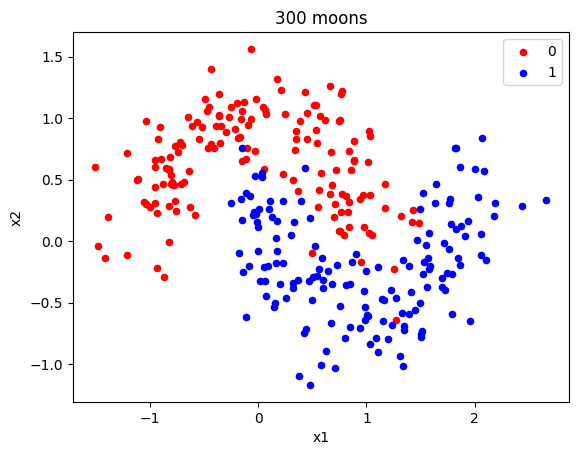

In [19]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

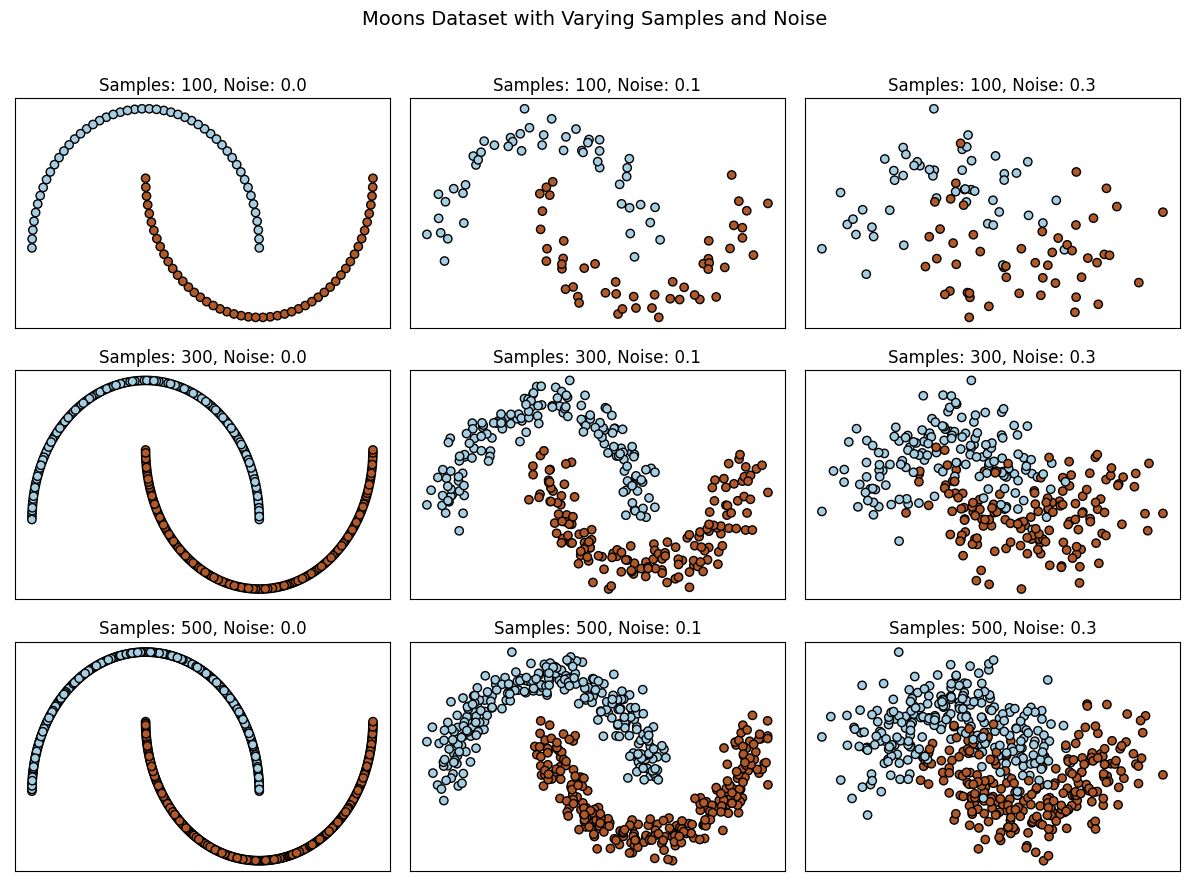

In [20]:
sample_values = [100, 300, 500]
noise_values = [0.0, 0.1, 0.3]

# Set up the figure for multiple subplots
fig, axes = plt.subplots(len(sample_values), len(noise_values), figsize=(12, 9))
fig.suptitle("Moons Dataset with Varying Samples and Noise", fontsize=14)

# Generate and plot moons for each combination of samples and noise
for i, n_samples in enumerate(sample_values):
    for j, noise in enumerate(noise_values):
        X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
        
        ax = axes[i, j]
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
        ax.set_title(f"Samples: {n_samples}, Noise: {noise}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [21]:
from sklearn.model_selection import train_test_split

n_samples = 250
noise = 0.20
random_state = 0


X, y = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)


print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (175, 2)
y_train shape: (175,)
X_test shape: (75, 2)
y_test shape: (75,)


## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
def initialize_model():

    #############################
    #  1 - Model architecture   #
    #############################    
    model = keras.Sequential([
        layers.Dense(5, activation='relu', input_dim=2),  # First layer with 5 neurons, ReLU activation
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 15        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set using `100 epochs`! 

Store the results of the training into a `history` variable. ❓

In [34]:
X_train.shape

(175, 2)

In [37]:
history = model.fit(X_train, y_train, batch_size=20, epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.8629
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2897 - accuracy: 0.8629
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2897 - accuracy: 0.8629
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2897 - accuracy: 0.8629
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2895 - accuracy: 0.8629
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.8629
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.8629
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.8629
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2894 - accuracy: 0.8629
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2893 - accuracy: 0.8629
Epoch 11/100
9/9 [===========

9/9 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.8571
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2856 - accuracy: 0.8571
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2854 - accuracy: 0.8571
Epoch 87/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2855 - accuracy: 0.8571
Epoch 88/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2854 - accuracy: 0.8571
Epoch 89/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8571
Epoch 90/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8571
Epoch 91/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2852 - accuracy: 0.8571
Epoch 92/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8571
Epoch 93/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2851 - accuracy: 0.8571
Epoch 94/100
9/9 [===============

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [38]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7f6d5e04b280>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.2898028790950775,
   0.2897133231163025,
   0.28969553112983704,
   0.2896924614906311,
   0.289528489112854,
   0.2894807755947113,
   0.28947022557258606,
   0.28940173983573914,
   0.2893867790699005,
   0.28932639956474304,
   0.28931164741516113,
   0.2893129885196686,
   0.28916504979133606,
   0.2891444265842438,
   0.2890709936618805,
   0.2890634536743164,
   0.2889532446861267,
   0.2889559268951416,
   0.28903430700302124,
   0.2888767123222351,
   0.28886792063713074,
   0.28874361515045166,
   0.28884443640708923,
   0.2886640727519989,
   0.28868114948272705,
   0.2886674702167511,
   0.28862452507019043,
   0.28856387734413147,
   0.2886185944080353,
   0.2884889841079712,
   0.28851354122161865,
   0.2883574068546295,
   0.28834182024002075,
   0.2883773744106293,
   0.2882629930973053,
   0.2882005

In [39]:
history.history

{'loss': [0.2898028790950775,
  0.2897133231163025,
  0.28969553112983704,
  0.2896924614906311,
  0.289528489112854,
  0.2894807755947113,
  0.28947022557258606,
  0.28940173983573914,
  0.2893867790699005,
  0.28932639956474304,
  0.28931164741516113,
  0.2893129885196686,
  0.28916504979133606,
  0.2891444265842438,
  0.2890709936618805,
  0.2890634536743164,
  0.2889532446861267,
  0.2889559268951416,
  0.28903430700302124,
  0.2888767123222351,
  0.28886792063713074,
  0.28874361515045166,
  0.28884443640708923,
  0.2886640727519989,
  0.28868114948272705,
  0.2886674702167511,
  0.28862452507019043,
  0.28856387734413147,
  0.2886185944080353,
  0.2884889841079712,
  0.28851354122161865,
  0.2883574068546295,
  0.28834182024002075,
  0.2883773744106293,
  0.2882629930973053,
  0.2882005572319031,
  0.28812727332115173,
  0.2880716025829315,
  0.2880561053752899,
  0.288056343793869,
  0.2879476547241211,
  0.28795796632766724,
  0.2878584563732147,
  0.28787222504615784,
  0.2877

❓ Plot the history of the train loss using the following function ❓

In [40]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

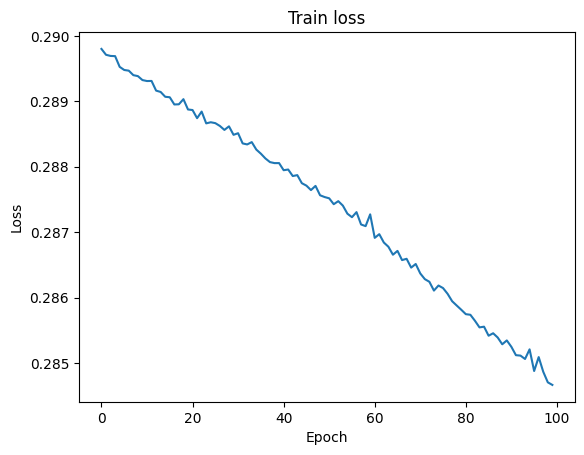

In [41]:
plot_history(history)

❓ What do you observe ❓

> YOUR ANSWER HERE

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [42]:
y_pred = model.predict(X_train)

6/6 [==============================] - 0s 2ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3/3 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.8533
Test Loss: 0.2883
Test Accuracy: 0.8533


**🧪 Test your code**

In [44]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/mahshid/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/mahshid/code/mahshid90/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-your-first-neural-network/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

1895/1895 [==============================] - 2s 894us/step


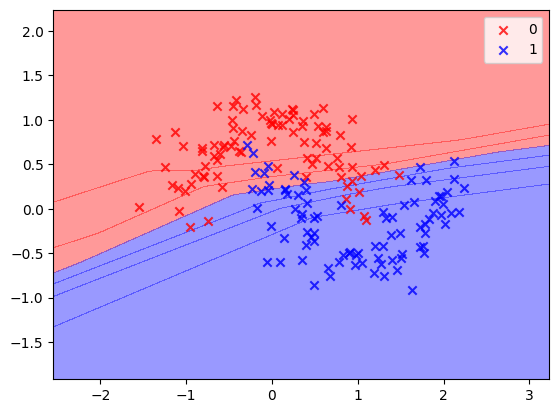

In [45]:
from utils.plots import plot_decision_regions
plot_decision_regions(X_train, y_train, model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [46]:
history = model.fit(X_train, y_train, batch_size=20, epochs=500)

Epoch 1/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2846 - accuracy: 0.8571
Epoch 2/500
9/9 [==============================] - 0s 5ms/step - loss: 0.2845 - accuracy: 0.8571
Epoch 3/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2845 - accuracy: 0.8571
Epoch 4/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2845 - accuracy: 0.8571
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2845 - accuracy: 0.8571
Epoch 6/500
9/9 [==============================] - 0s 4ms/step - loss: 0.2846 - accuracy: 0.8571
Epoch 7/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.8571
Epoch 8/500
9/9 [==============================] - 0s 4ms/step - loss: 0.2844 - accuracy: 0.8571
Epoch 9/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2843 - accuracy: 0.8571
Epoch 10/500
9/9 [==============================] - 0s 4ms/step - loss: 0.2842 - accuracy: 0.8571
Epoch 11/500
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.8629
Epoch 85/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.8629
Epoch 86/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.8629
Epoch 87/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2798 - accuracy: 0.8629
Epoch 88/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2796 - accuracy: 0.8686
Epoch 89/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.8686
Epoch 90/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.8686
Epoch 91/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.8629
Epoch 92/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2793 - accuracy: 0.8629
Epoch 93/500
9/9 [==============================] - 0s 5ms/step - loss: 0.2792 - accuracy: 0.8629
Epoch 94/500
9/9 [===============

9/9 [==============================] - 0s 3ms/step - loss: 0.2731 - accuracy: 0.8857
Epoch 168/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.8857
Epoch 169/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8857
Epoch 170/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.8857
Epoch 171/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.8857
Epoch 172/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2728 - accuracy: 0.8857
Epoch 173/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2727 - accuracy: 0.8857
Epoch 174/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2726 - accuracy: 0.8857
Epoch 175/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.8857
Epoch 176/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.8857
Epoch 177/500
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8857
Epoch 250/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.8857
Epoch 251/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2656 - accuracy: 0.8857
Epoch 252/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2657 - accuracy: 0.8857
Epoch 253/500
9/9 [==============================] - 0s 5ms/step - loss: 0.2654 - accuracy: 0.8857
Epoch 254/500
9/9 [==============================] - 0s 5ms/step - loss: 0.2653 - accuracy: 0.8857
Epoch 255/500
9/9 [==============================] - 0s 4ms/step - loss: 0.2652 - accuracy: 0.8857
Epoch 256/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2652 - accuracy: 0.8857
Epoch 257/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.8857
Epoch 258/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.8914
Epoch 259/500
9/9 [=====

9/9 [==============================] - 0s 4ms/step - loss: 0.2586 - accuracy: 0.8971
Epoch 332/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2585 - accuracy: 0.8971
Epoch 333/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.8971
Epoch 334/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.8971
Epoch 335/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2582 - accuracy: 0.8971
Epoch 336/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.8971
Epoch 337/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2580 - accuracy: 0.8971
Epoch 338/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8971
Epoch 339/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8971
Epoch 340/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8971
Epoch 341/500
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.9029
Epoch 414/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.9029
Epoch 415/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.9029
Epoch 416/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.9029
Epoch 417/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9029
Epoch 418/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.9029
Epoch 419/500
9/9 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.9029
Epoch 420/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.9029
Epoch 421/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.9029
Epoch 422/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.9029
Epoch 423/500
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.2422 - accuracy: 0.8971
Epoch 496/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.8971
Epoch 497/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.8971
Epoch 498/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.8971
Epoch 499/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.8971
Epoch 500/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.8971


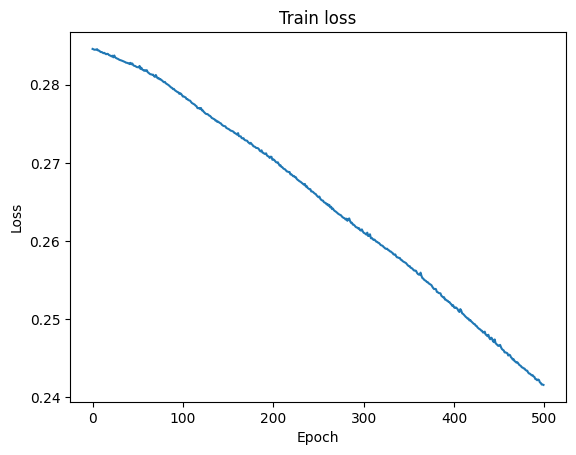

In [47]:
plot_history(history)

❓ Did the test accuracy improve? ❓

In [48]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3/3 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.8933
Test Loss: 0.2575
Test Accuracy: 0.8933


<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   

    model = Sequential()
    model.add(layers.Dense(20, activation='relu', input_dim=2))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                60        
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.count_params()

331

In [ ]:
331

❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [52]:
history = model.fit(X_train, y_train, batch_size=20, epochs=500)

Epoch 1/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7290 - accuracy: 0.4914
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.4857
Epoch 3/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.4629
Epoch 4/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.4286
Epoch 5/500
9/9 [==============================] - 0s 5ms/step - loss: 0.6586 - accuracy: 0.4571
Epoch 6/500
9/9 [==============================] - 0s 4ms/step - loss: 0.6453 - accuracy: 0.6343
Epoch 7/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.7371
Epoch 8/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.7886
Epoch 9/500
9/9 [==============================] - 0s 5ms/step - loss: 0.5955 - accuracy: 0.7943
Epoch 10/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.8000
Epoch 11/500
9/9 [===========

9/9 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9257
Epoch 85/500
9/9 [==============================] - 0s 4ms/step - loss: 0.2103 - accuracy: 0.9200
Epoch 86/500
9/9 [==============================] - 0s 4ms/step - loss: 0.2103 - accuracy: 0.9257
Epoch 87/500
9/9 [==============================] - 0s 7ms/step - loss: 0.2103 - accuracy: 0.9257
Epoch 88/500
9/9 [==============================] - 0s 5ms/step - loss: 0.2082 - accuracy: 0.9314
Epoch 89/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9257
Epoch 90/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9314
Epoch 91/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2056 - accuracy: 0.9314
Epoch 92/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9314
Epoch 93/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9314
Epoch 94/500
9/9 [===============

9/9 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9486
Epoch 168/500
9/9 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.9486
Epoch 169/500
9/9 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9486
Epoch 170/500
9/9 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9429
Epoch 171/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1372 - accuracy: 0.9543
Epoch 172/500
9/9 [==============================] - 0s 4ms/step - loss: 0.1352 - accuracy: 0.9543
Epoch 173/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1343 - accuracy: 0.9486
Epoch 174/500
9/9 [==============================] - 0s 3ms/step - loss: 0.1328 - accuracy: 0.9543
Epoch 175/500
9/9 [==============================] - 0s 4ms/step - loss: 0.1324 - accuracy: 0.9543
Epoch 176/500
9/9 [==============================] - 0s 6ms/step - loss: 0.1334 - accuracy: 0.9543
Epoch 177/500
9/9 [=====

9/9 [==============================] - 0s 5ms/step - loss: 0.0653 - accuracy: 0.9771
Epoch 250/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9829
Epoch 251/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9829
Epoch 252/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9829
Epoch 253/500
9/9 [==============================] - 0s 5ms/step - loss: 0.0624 - accuracy: 0.9829
Epoch 254/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0625 - accuracy: 0.9829
Epoch 255/500
9/9 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.9829
Epoch 256/500
9/9 [==============================] - 0s 5ms/step - loss: 0.0622 - accuracy: 0.9829
Epoch 257/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9829
Epoch 258/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.9829
Epoch 259/500
9/9 [=====

9/9 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 0.9886
Epoch 332/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9886
Epoch 333/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9829
Epoch 334/500
9/9 [==============================] - 0s 4ms/step - loss: 0.0426 - accuracy: 0.9886
Epoch 335/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9886
Epoch 336/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9886
Epoch 337/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9943
Epoch 338/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9886
Epoch 339/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9886
Epoch 340/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9886
Epoch 341/500
9/9 [=====

9/9 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9886
Epoch 414/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9886
Epoch 415/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9886
Epoch 416/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9886
Epoch 417/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9886
Epoch 418/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9886
Epoch 419/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9886
Epoch 420/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9886
Epoch 421/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9886
Epoch 422/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9886
Epoch 423/500
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9943
Epoch 496/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9943
Epoch 497/500
9/9 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9943
Epoch 498/500
9/9 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 0.9943
Epoch 499/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9886
Epoch 500/500
9/9 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9943


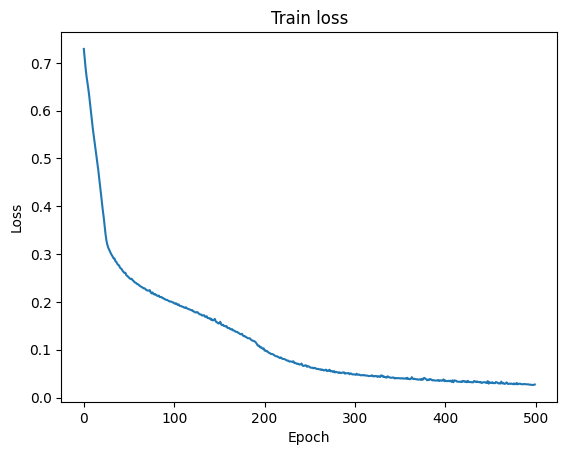

In [55]:
plot_history(history)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [56]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3/3 [==============================] - 0s 3ms/step - loss: 0.2464 - accuracy: 0.9200
Test Loss: 0.2464
Test Accuracy: 0.9200


In [57]:
accuracy_deep = accuracy
accuracy_deep

0.9200000166893005

🧪 **Test your code**

In [58]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/mahshid/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/mahshid/code/mahshid90/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-your-first-neural-network/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

In [ ]:
plot_decision_regions(X_train, y_train, model)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!